# 📊 Stack Overflow Language Trends (2018–2024)

## 🎯 Main Analysis Goals:
- Identify the top programming languages used each year (2018–2024)
- Detect trends and shifts in language popularity
- Highlight languages that are emerging (e.g., **SAS** in 2023)
- Spot “fossilised” languages (e.g., languages that disappear or sharply decline)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib.ticker import StrMethodFormatter
from datetime import datetime
from scipy.interpolate import make_interp_spline
import numpy as np

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None) 

In [3]:
df = pd.read_csv("all_languages_2018_2024_cleaned_2025-06-14_21-53-33.csv")

In [4]:
df_lang_all = df.copy()

In [5]:
df_lang_all = df_lang_all.rename(columns={"LanguageHaveWorkedWith": "Language"})

In [6]:
# Standardise inconsistent language labels across all years 
# (excluding HTML/CSS, which was already handled during data cleaning on June 14 20:58)
# This step ensures consistency in naming conventions (e.g., Visual Basic variants, MATLAB, etc.

In [7]:
df_lang_all['Language'] = df_lang_all['Language'].replace({
    # Visual Basic variants
    'Visual Basic (.Net)': 'Visual Basic',
    'Visual Basic 6': 'Visual Basic',
    'VB.NET': 'Visual Basic',

    # MATLAB
    'Matlab': 'MATLAB',

    # Delphi
    'Delphi/Object Pascal': 'Delphi',

    # Lisp variants
    'Lisp': 'LISP',

    # OCaml
    'Ocaml': 'OCaml',

    # COBOL
    'Cobol': 'COBOL',

    # Bash/Shell
    'Bash/Shell': 'Bash/Shell (all shells)',
    'Bash/Shell/PowerShell': 'Bash/Shell (all shells)',

    # Other polishing
    'Other(s):': 'Other',
})

In [117]:
# Mapping color of interest (Top Languages + Fossilised Languages)
color_map = {
    # 🎯 Core Languages
    'Python': '#3776AB',        # Python Blue
    'SQL': '#336791',           # PostgreSQL Blue
    'SAS': '#1A4FA3',           # SAS Blue
    'JavaScript': '#F7DF1E',    # JavaScript Yellow
    'HTML/CSS': '#E44D26',      # HTML Orange
    'TypeScript': '#3178C6',    # TypeScript Blue
    'Java': '#EA2D2E',          # Java Red (Oracle)
    'C#': '#9B4F96',            # C# Purple
    'C++': '#00599C',           # C++ Navy Blue
    'Bash/Shell (all shells)': '#4EAA25',  # Shell Green
    'C': '#A8B9CC',             # C Cyan Blue

    # 🦖 Fossilised Languages
    'Visual Basic': '#68217A',  # Classic VB Purple (Microsoft)
    'Objective-C': '#438EFF',   # Apple Dev Blue (similar to Xcode)
    'Ruby': '#CC342D',          # Ruby Red
    'Swift': '#F05138',         # Swift Orange
    'MATLAB': '#0076A8',        # MATLAB Blue
    'Scala': '#DC322F',         # Scala Red
    'R': '#1E62A1',             # R Official Blue
    'Perl': '#0298C3',          # Perl Camel Blue
    'VBA': '#185ABD',           # Office/VBA Blue
    'Groovy': '#4298B8'         # Groovy Blue
}

In [8]:
df_lang_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2762873 entries, 0 to 2762872
Data columns (total 4 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   ResponseId          int64 
 1   Language            object
 2   Year                int64 
 3   GlobalRespondentID  object
dtypes: int64(2), object(2)
memory usage: 84.3+ MB


In [9]:
sorted(df_lang_all["Language"].unique())

['APL',
 'Ada',
 'Apex',
 'Assembly',
 'Bash/Shell (all shells)',
 'C',
 'C#',
 'C++',
 'COBOL',
 'Clojure',
 'CoffeeScript',
 'Crystal',
 'Dart',
 'Delphi',
 'Elixir',
 'Erlang',
 'F#',
 'Flow',
 'Fortran',
 'GDScript',
 'Go',
 'Groovy',
 'HTML/CSS',
 'Hack',
 'Haskell',
 'Java',
 'JavaScript',
 'Julia',
 'Kotlin',
 'LISP',
 'Lua',
 'MATLAB',
 'MicroPython',
 'Nim',
 'Node.js',
 'OCaml',
 'Objective-C',
 'Other',
 'PHP',
 'Perl',
 'PowerShell',
 'Prolog',
 'Python',
 'R',
 'Raku',
 'Ruby',
 'Rust',
 'SAS',
 'SQL',
 'Scala',
 'Solidity',
 'Swift',
 'TypeScript',
 'VBA',
 'Visual Basic',
 'WebAssembly',
 'Zephyr',
 'Zig']

In [10]:
len(df_lang_all["Language"].unique())

58

In [11]:
df_lang_all.head(5)

,ResponseId,Language,Year,GlobalRespondentID
0,1,JavaScript,2018,2018_1
1,1,Python,2018,2018_1
2,1,HTML/CSS,2018,2018_1
3,10,JavaScript,2018,2018_10
4,10,TypeScript,2018,2018_10


## Chart 01 — Most Used Programming Languages by Developer Count (2024)

📊 **Chart 01 Overview**  
- **Chart Type**: Bar chart  
- **Data**: Top 10 most used programming languages in 2024 (by count)  
- **Purpose**: Show raw usage popularity (not normalised by percentage)

In [12]:
df_2024_only = df_lang_all[df_lang_all['Year'] == 2024]

In [13]:
df_lang_count_2024 = df_2024_only['Language'].value_counts().head(10)

In [14]:
df_2024_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322233 entries, 2440640 to 2762872
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ResponseId          322233 non-null  int64 
 1   Language            322233 non-null  object
 2   Year                322233 non-null  int64 
 3   GlobalRespondentID  322233 non-null  object
dtypes: int64(2), object(2)
memory usage: 12.3+ MB


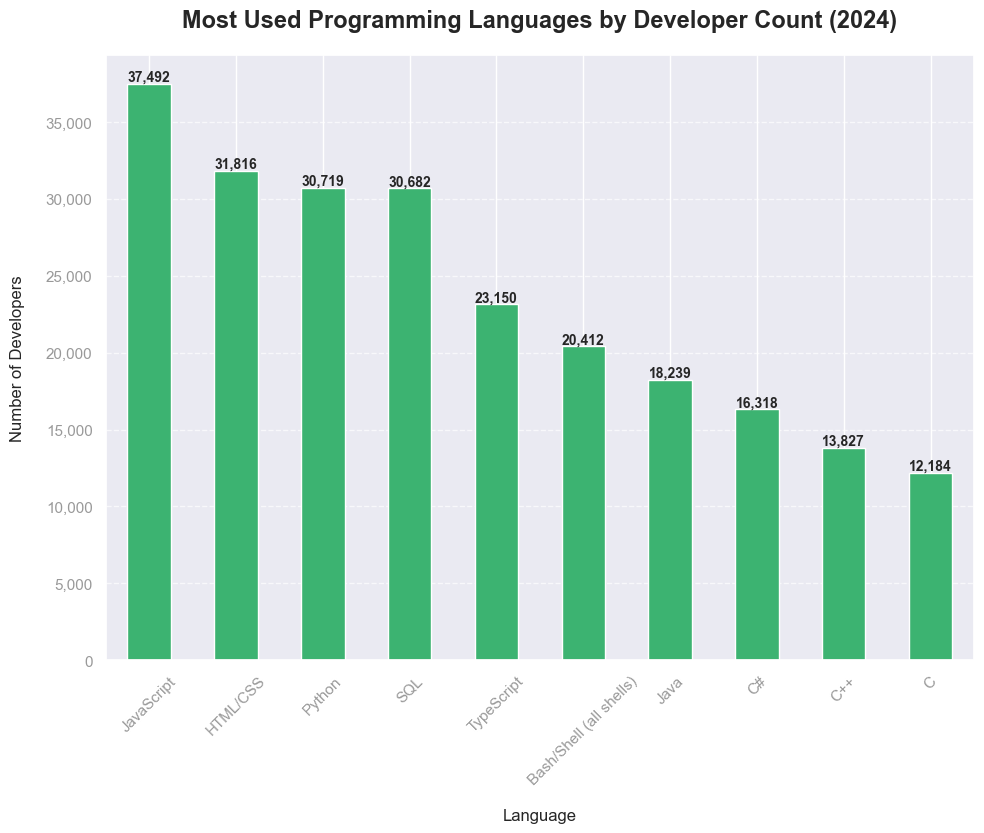

In [125]:
#plot
ax = df_lang_count_2024.plot(kind='bar',
                             color='mediumseagreen',
                            figsize=(10, 8.5))

#title and label setting
plt.title("Most Used Programming Languages by Developer Count (2024)", 
          fontsize = 17,
          fontweight = "bold",
          pad = 20)
plt.ylabel("Number of Developers",
          labelpad = 15)
plt.xlabel("Language",
           labelpad=15)
plt.xticks(rotation=45,
          alpha = 0.8,
          color = "grey")
plt.yticks(color = "grey",
          alpha = 0.8)
plt.grid(axis='y',
         linestyle='--',
         alpha=0.7)

#format xticks with ,
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))


#Add number labels
for p in ax.patches:
    value = int(p.get_height())
    ax.annotate(f'{value:,}', 
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom',
                fontsize=10, fontweight='bold')
    
plt.tight_layout()
plt.show()

## 📊 Chart 02 — Most Used Programming Languages by Percentage of Mentions (2024)

**Chart Type**: Bar chart  
**Data**: Stack Overflow Developer Survey 2024  
**Purpose**: Show the top 10 programming languages by their relative popularity as a percentage of total language mentions. An “Others” category groups the remaining 39 languages for clarity.

In [16]:
df_2024_only = df_lang_all[df_lang_all['Year'] == 2024]

# Value counts from the full concatenated DataFrame
df_lang_count_2024 = df_2024_only['Language'].value_counts().head(10)

# Total entries for percentage calculation
total_lang_entries_2024 = len(df_2024_only)

In [17]:
#making the percenatge

# Get top 10 language counts
df_lang_count_2024 = df_2024_only['Language'].value_counts().head(10)

# Get total number of entries (for % calculation)
total_lang_entries_2024 = len(df_2024_only)

# Convert counts to percentages
df_lang_pct_2024 = (df_lang_count_2024 / total_lang_entries_2024) * 100

In [18]:
# adding other to spotlight reasoning on top 10
total_mentions_2024 = df_2024_only.shape[0]

# Calculate percentage of all languages
df_lang_pct_2024 = df_2024_only['Language'].value_counts(normalize=True) * 100

# Slice top 10 and calculate "Others"
top_10_pct = df_lang_pct_2024.head(10)
others_pct = 100 - top_10_pct.sum()

# Add "Others" category
df_lang_pct_2024_top10 = top_10_pct.copy()
df_lang_pct_2024_top10["Others"] = others_pct

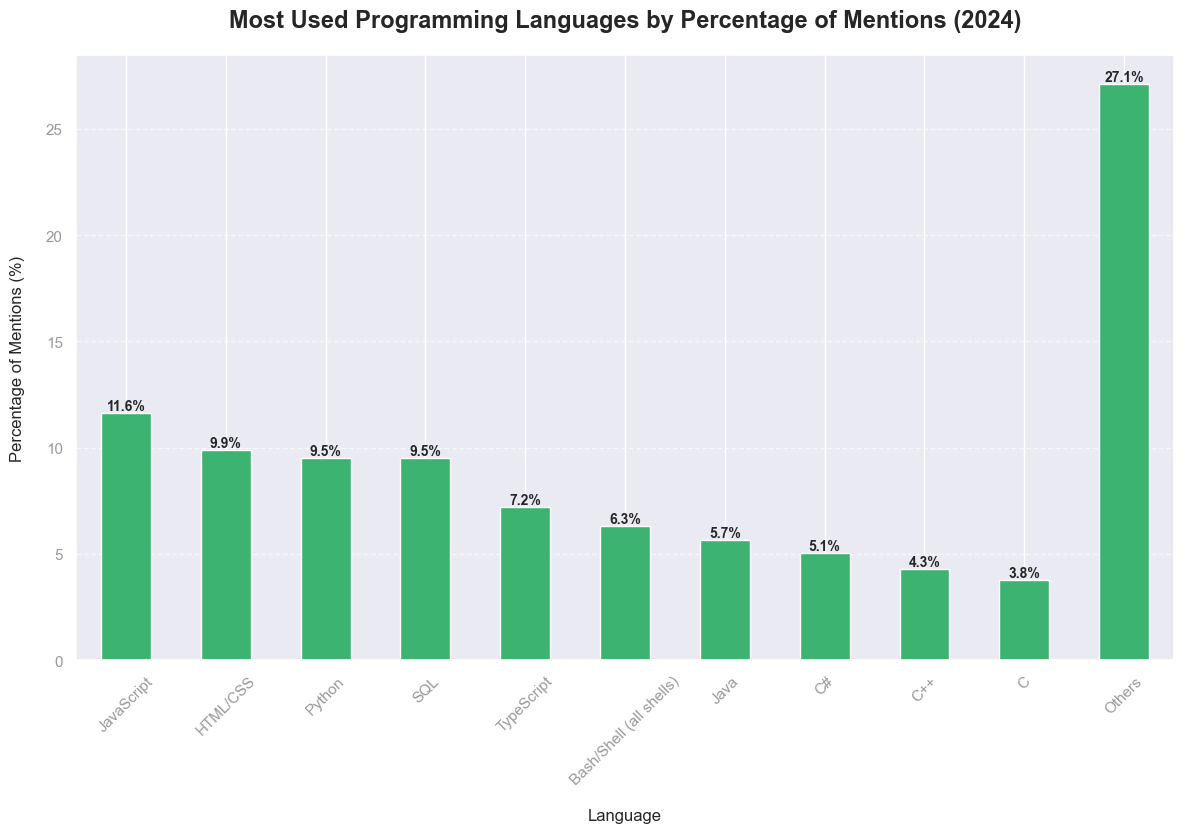

In [126]:
# Plot with "Others" included
ax = df_lang_pct_2024_top10.plot(
    kind='bar',
    color='mediumseagreen',
    figsize=(12, 8.5)
)


# Title and labels
plt.title("Most Used Programming Languages by Percentage of Mentions (2024)",
          fontsize=17,
          fontweight="bold",
          pad=20)

plt.ylabel("Percentage of Mentions (%)",
           labelpad=15)
plt.xlabel("Language",
           labelpad=15)

# Tick formatting
plt.xticks(rotation=45,
           alpha=0.8,
           color="grey")
plt.yticks(color="grey",
           alpha=0.8)
plt.grid(axis='y',
         linestyle='--',
         alpha=0.7)

# Add percentage labels
for p in ax.patches:
    value = p.get_height()
    ax.annotate(f'{value:.1f}%', 
                (p.get_x() + p.get_width() / 2, value),
                ha='center', va='bottom',
                fontsize=10, fontweight='bold')
#print and show

plt.tight_layout()
plt.show()


📝 Note: This chart shows the top 10 of 48 unique languages (2024 only).
The remaining 39 languages are grouped under "Others" in the percentage chart.

## Chart 03 — Percentage Trends in Programming Language Usage (2018–2024)

**Chart Type**: Multi-line chart  
**Data**: Stack Overflow Developer Survey 2018–2024  
**Purpose**: Visualise how the popularity (in % of mentions) of the top 10 programming languages has changed over time. This chart normalises developer language mentions per year to show relative trends.


In [20]:
df_lang_trend = df_lang_all.groupby(['Year', 'Language'])['GlobalRespondentID'].count().reset_index()

In [21]:
df_lang_trend.rename(columns={'GlobalRespondentID': 'Count'}, 
                     inplace=True)

In [22]:
df_lang_pivot = df_lang_trend.pivot(index='Year', columns='Language', values='Count')

In [23]:
yearly_totals = df_lang_pivot.sum(axis=1) 

In [24]:
df_lang_pct_pivot = df_lang_pivot.div(yearly_totals, axis=0) * 100

In [25]:
#top 10 language
df_top_langs_18_24 = df_lang_pct_pivot.loc[2024].sort_values(ascending=False).head(10).index.tolist()

In [26]:
print(df_top_langs_18_24)

['JavaScript', 'HTML/CSS', 'Python', 'SQL', 'TypeScript', 'Bash/Shell (all shells)', 'Java', 'C#', 'C++', 'C']


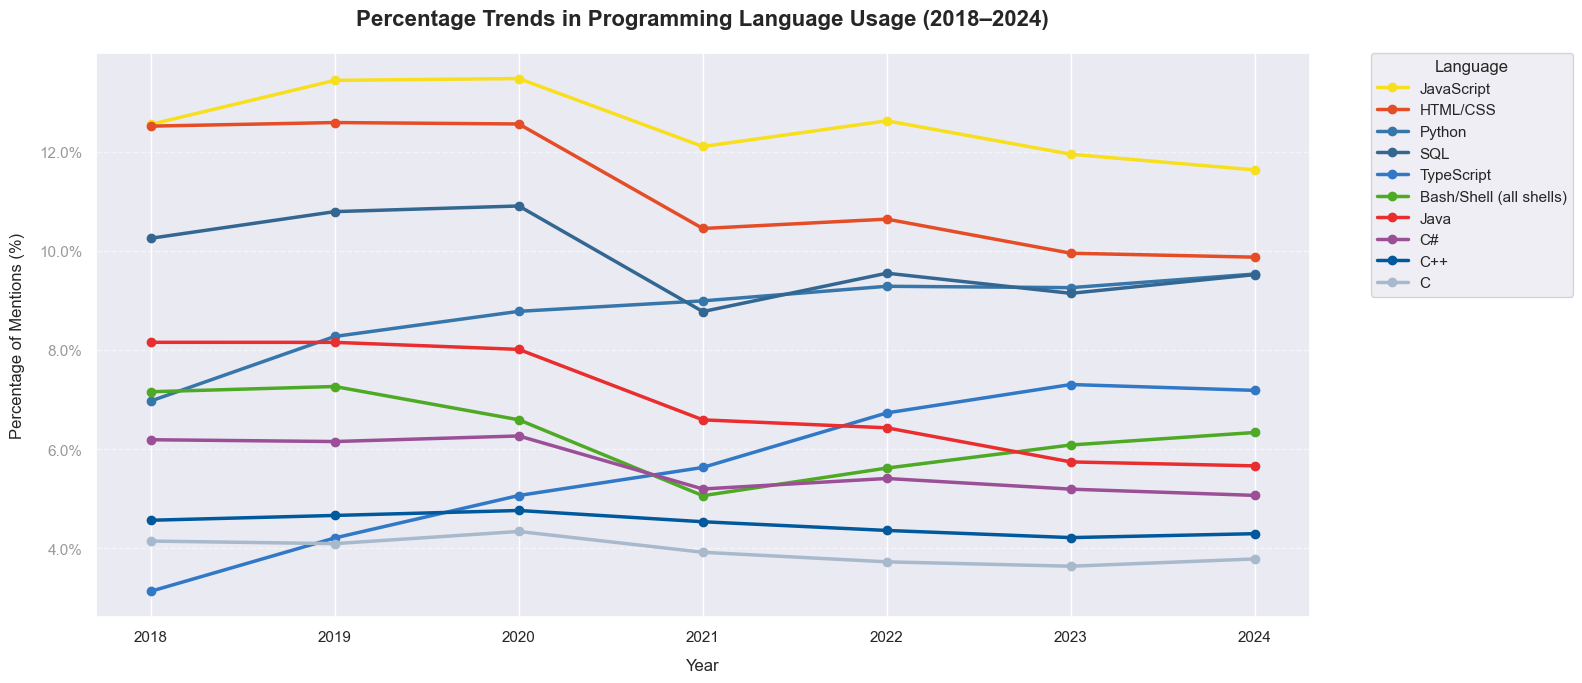

In [131]:
# plot 
plt.figure(figsize=(16, 7))

#plotting each of 10 lang
for lang in df_top_langs_18_24:
    plt.plot(df_lang_pct_pivot.index,           # x-axis: years
             df_lang_pct_pivot[lang],           # y-axis: % mentions
             label=lang,
             linewidth=2.5,
             marker='o',
             markersize= 6,
             color=color_map.get(lang, 'grey'))  # fallback grey if not mapped

#title and label setting
plt.title("Percentage Trends in Programming Language Usage (2018–2024)",
          fontsize=16,
          fontweight ='bold',
          pad=20)
plt.xlabel("Year",
           labelpad=10)
plt.ylabel("Percentage of Mentions (%)",
           labelpad=10)

#grid and ticks
plt.grid(axis='y',
         linestyle='--',
         alpha=0.5)
plt.xticks(df_lang_pct_pivot.index)  # ensures all years are shown on x-axis
plt.yticks(color="grey",
           alpha=0.8)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:.1f}%')) 

#lagend and layout
plt.legend(title='Language',
           bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=0.)
plt.tight_layout()

#prin and show
plt.show()

# Percentage Trends of the Top 5 Programming Languages from 2018 to 2024

In [28]:
#avg percentage per lang across the year
avg_lang_pct = df_lang_pct_pivot.mean()

In [29]:
top5_langs = avg_lang_pct.sort_values(ascending=False).head(5).index.tolist()

In [30]:
df_top5_pct = df_lang_pct_pivot[top5_langs]

In [31]:
print(df_top5_pct.head())

Language  JavaScript   HTML/CSS        SQL    Python      Java
Year                                                          
2018       12.554380  12.519026  10.254986  6.969579  8.154631
2019       13.443434  12.591458  10.793067  8.273005  8.153596
2020       13.479674  12.562673  10.907140  8.780086  8.011694
2021       12.108415  10.452594   8.775081  8.991323  6.589389
2022       12.626522  10.641589   9.550026  9.285767  6.428127


In [32]:
df_top5_pct_reset = df_top5_pct.reset_index()  # brings 'Year' back as a column

In [33]:
print(df_top5_pct_reset.head())

Language  Year  JavaScript   HTML/CSS        SQL    Python      Java
0         2018   12.554380  12.519026  10.254986  6.969579  8.154631
1         2019   13.443434  12.591458  10.793067  8.273005  8.153596
2         2020   13.479674  12.562673  10.907140  8.780086  8.011694
3         2021   12.108415  10.452594   8.775081  8.991323  6.589389
4         2022   12.626522  10.641589   9.550026  9.285767  6.428127


In [34]:
df_top5_pct_melted = pd.melt(df_top5_pct_reset,
                             id_vars='Year',
                             var_name='Language',
                             value_name='Percentage')

In [35]:
print(df_top5_pct_melted.head())

   Year    Language  Percentage
0  2018  JavaScript   12.554380
1  2019  JavaScript   13.443434
2  2020  JavaScript   13.479674
3  2021  JavaScript   12.108415
4  2022  JavaScript   12.626522


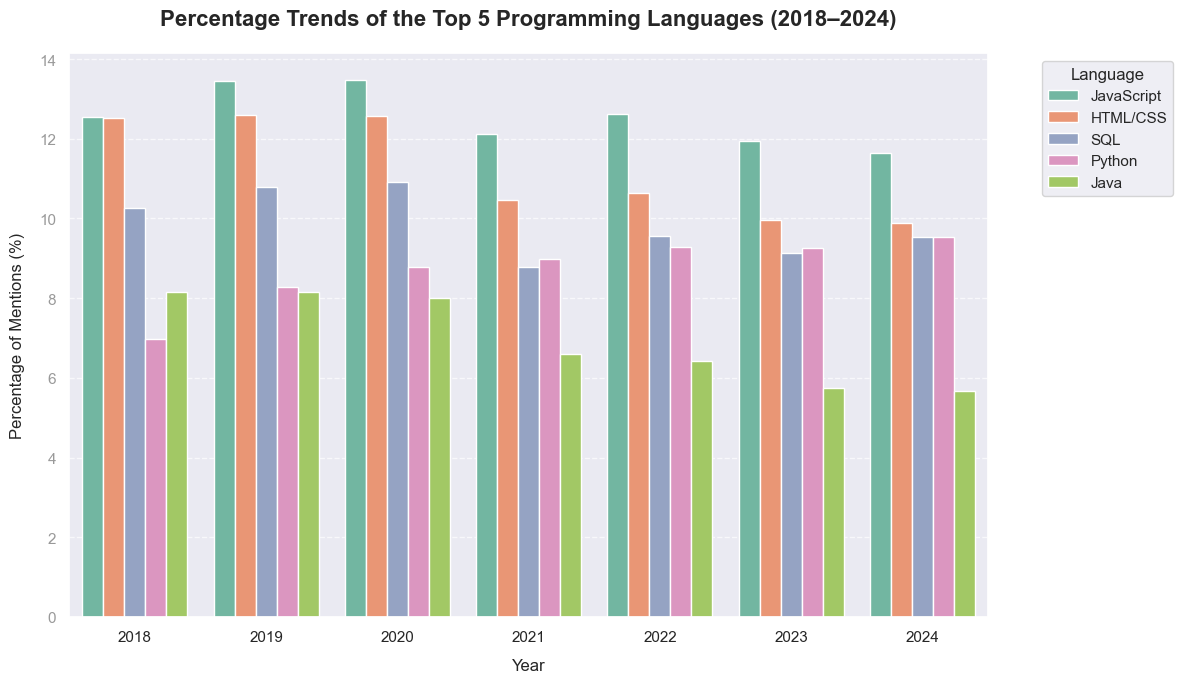

In [36]:
plt.figure(figsize=(12, 7))

# Plot
sns.barplot(data=df_top5_pct_melted,
            x='Year', 
            y='Percentage',
            hue='Language',
            palette='Set2',
            hue_order=top5_langs)

# Title & labels
plt.title("Percentage Trends of the Top 5 Programming Languages (2018–2024)", 
          fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Year", labelpad=10)
plt.ylabel("Percentage of Mentions (%)", labelpad=10)

# Grid & styling
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.yticks(color='grey', alpha=0.8)

# Legend
plt.legend(title='Language', 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left')

# Format and show
plt.tight_layout()
plt.show()

In [37]:
# Note: Legend order reflects original DataFrame column order, not 2024 rankin

# Yearly Trends of the Top 5 Programming Languages (2018–2024)

In [38]:
df_top_langs_18_24_top5 = df_lang_pct_pivot.loc[2024].sort_values(ascending=False).head(5).index.tolist()

In [39]:
print(df_top_langs_18_24_top5)

['JavaScript', 'HTML/CSS', 'Python', 'SQL', 'TypeScript']


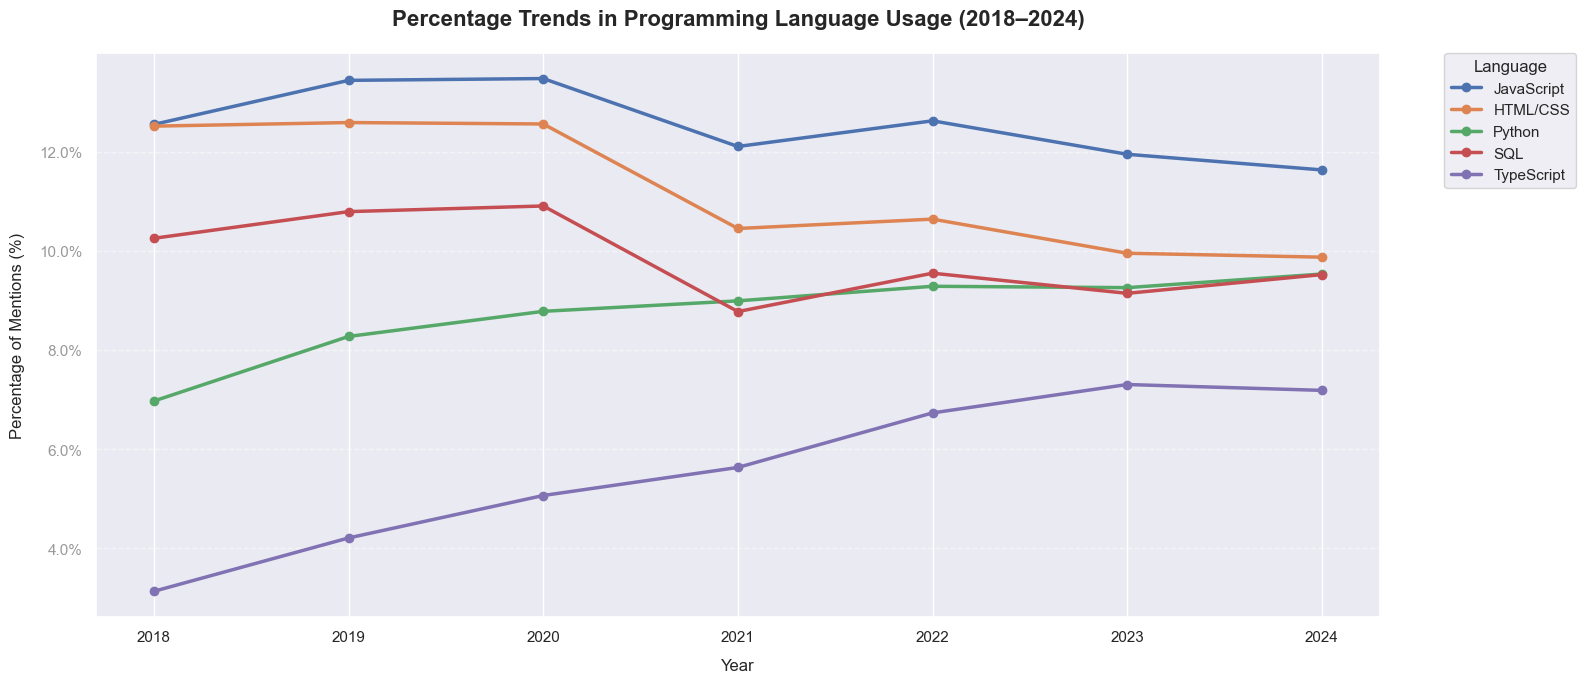

In [46]:
# plot 
plt.figure(figsize=(16, 7))

#plotting each of 5 lang
for lang in df_top_langs_18_24_top5:
    plt.plot(df_lang_pct_pivot.index,           # x-axis: year
             df_lang_pct_pivot[lang],           # y-axis: % of mentions
             label=lang,
             linewidth=2.5,
             marker='o') 

#title and label setting
plt.title("Percentage Trends in Programming Language Usage (2018–2024)",
          fontsize=16,
          fontweight ='bold',
          pad=20)
plt.xlabel("Year",
           labelpad=10)
plt.ylabel("Percentage of Mentions (%)",
           labelpad=10)

#grid and ticks
plt.grid(axis='y',
         linestyle='--',
         alpha=0.5)
plt.xticks(df_lang_pct_pivot.index)  # ensures all years are shown on x-axis
plt.yticks(color="grey",
           alpha=0.8)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:.1f}%')) 

#lagend and layout
plt.legend(title='Language',
           bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=0.)
plt.tight_layout()

#prin and show
plt.show()

# SAS emerge

In [58]:
df_lang_all.head(3)

,ResponseId,Language,Year,GlobalRespondentID
0,1,JavaScript,2018,2018_1
1,1,Python,2018,2018_1
2,1,HTML/CSS,2018,2018_1


In [49]:
df_sas = df_lang_all[df_lang_all['Language'] == 'SAS']

In [59]:
df_sas.head(50)

,ResponseId,Language,Year,GlobalRespondentID
1607916,10209,SAS,2022,2022_10209
1608607,10324,SAS,2022,2022_10324
1608723,10342,SAS,2022,2022_10342
1609164,10414,SAS,2022,2022_10414
1609414,10453,SAS,2022,2022_10453
1610569,10644,SAS,2022,2022_10644
1611392,10783,SAS,2022,2022_10783
1611697,10839,SAS,2022,2022_10839
1612233,10948,SAS,2022,2022_10948
1612847,11048,SAS,2022,2022_11048


In [52]:
df_sas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 862 entries, 1607916 to 2440026
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ResponseId          862 non-null    int64 
 1   Language            862 non-null    object
 2   Year                862 non-null    int64 
 3   GlobalRespondentID  862 non-null    object
dtypes: int64(2), object(2)
memory usage: 33.7+ KB


In [60]:
#grouping by year
sas_counts = df_sas.groupby('Year')['GlobalRespondentID'].nunique()

In [61]:
print(sas_counts)

Year
2022    435
2023    427
Name: GlobalRespondentID, dtype: int64


In [62]:
#checking why there 2024, on the counts, a: 2024 is missing all together or, it just no entry on 2024

In [63]:
print(df_lang_all['Year'].unique())

[2018 2019 2020 2021 2022 2023 2024]


In [65]:
sorted(df_lang_all[df_lang_all['Year'] == 2024]['Language'].unique())

['Ada',
 'Apex',
 'Assembly',
 'Bash/Shell (all shells)',
 'C',
 'C#',
 'C++',
 'COBOL',
 'Clojure',
 'Crystal',
 'Dart',
 'Delphi',
 'Elixir',
 'Erlang',
 'F#',
 'Fortran',
 'GDScript',
 'Go',
 'Groovy',
 'HTML/CSS',
 'Haskell',
 'Java',
 'JavaScript',
 'Julia',
 'Kotlin',
 'LISP',
 'Lua',
 'MATLAB',
 'MicroPython',
 'Nim',
 'OCaml',
 'Objective-C',
 'PHP',
 'Perl',
 'PowerShell',
 'Prolog',
 'Python',
 'R',
 'Ruby',
 'Rust',
 'SQL',
 'Scala',
 'Solidity',
 'Swift',
 'TypeScript',
 'VBA',
 'Visual Basic',
 'Zephyr',
 'Zig']

In [66]:
full_years = list(range(2018, 2025))
sas_counts = sas_counts.reindex(full_years, fill_value=0).reset_index()
sas_counts.columns = ['Year', 'sas_user_count']

In [68]:
sas_counts

,Year,sas_user_count
0,2018,0
1,2019,0
2,2020,0
3,2021,0
4,2022,435
5,2023,427
6,2024,0


In [69]:
sas_counts = df_sas.groupby('Year')['GlobalRespondentID'].nunique().reindex(full_years, 
                                                                            fill_value=0).reset_index()
sas_counts.columns = ['Year', 'sas_user_count']

In [121]:
# using the earlier count
total_responses = yearly_totals.reset_index()
total_responses.columns = ['Year', 'total_responses']

# Merge
sas_pct = pd.merge(sas_counts, 
                   total_responses, 
                   on='Year')

# Calculate %
sas_pct['sas_percentage'] = (sas_pct['sas_user_count'] / sas_pct['total_responses'] * 100).round(3)

In [122]:
sas_pct

,Year,sas_user_count,total_responses,sas_percentage
0,2018,0,435593.0,0.000
1,2019,0,440505.0,0.000
2,2020,0,288004.0,0.000
3,2021,0,442560.0,0.000
4,2022,435,367821.0,0.118
5,2023,427,466157.0,0.092
6,2024,0,322233.0,0.000


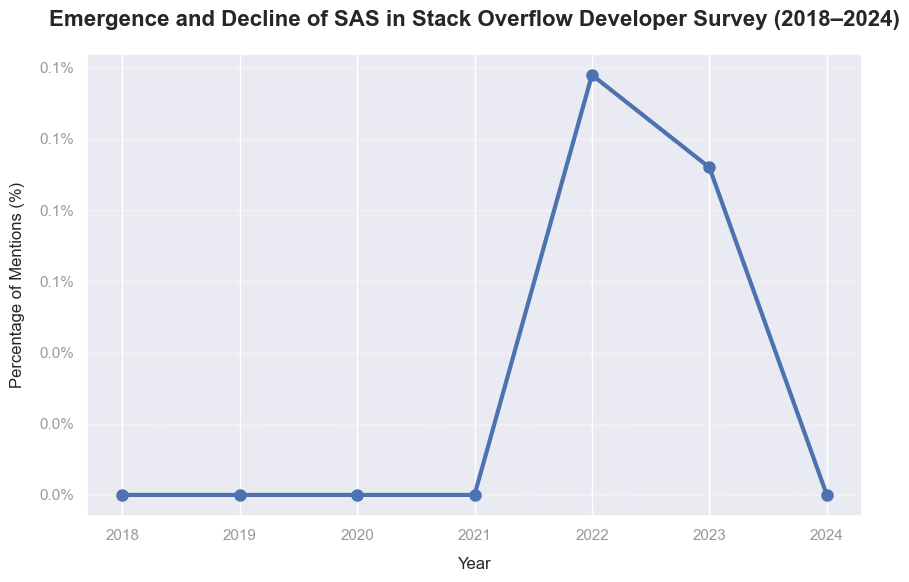

In [123]:
#plot
plt.figure(figsize=(10, 6))
plt.plot(sas_pct['Year'],
         sas_pct['sas_percentage'], 
         marker='o', 
         linewidth = 3,
        markersize = 8)


#title and label setting
plt.title("Emergence and Decline of SAS in Stack Overflow Developer Survey (2018–2024)",
         fontsize = 16,
         fontweight = "bold",
         pad = 20)
plt.xlabel("Year",
          labelpad = 10)
plt.ylabel("Percentage of Mentions (%)",
          labelpad = 10)

#grid and ticks
plt.grid(axis='y',
         linestyle='--',
         alpha=0.5)
plt.xticks(sas_pct['Year'],
           color = "grey",
          alpha = 0.8)
plt.yticks(color ="grey",
           alpha = 0.8)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:.1f}%')) # percentage format


#print and show
plt.show()

# Once Popular, Now Forgotten: Declining Languages (2018–2024)

Top down 5

In [88]:
pct_2018 = df_lang_pct_pivot.loc[2018]
pct_2024 = df_lang_pct_pivot.loc[2024]

Above 0.6% in 2018 \
Below 0.8% in 2024

In [106]:
fossilised_candidates = pct_2018[(pct_2018 > 0.6) & (pct_2024 < 0.8)].index.tolist()

In [107]:
drop = (pct_2018 - pct_2024)[fossilised_candidates]

In [108]:
top_5_fossilised_langs = drop.sort_values(ascending=False).head(5).index.tolist()

In [109]:
print(top_5_fossilised_langs)

['Visual Basic', 'Objective-C', 'MATLAB', 'Scala', 'Perl']


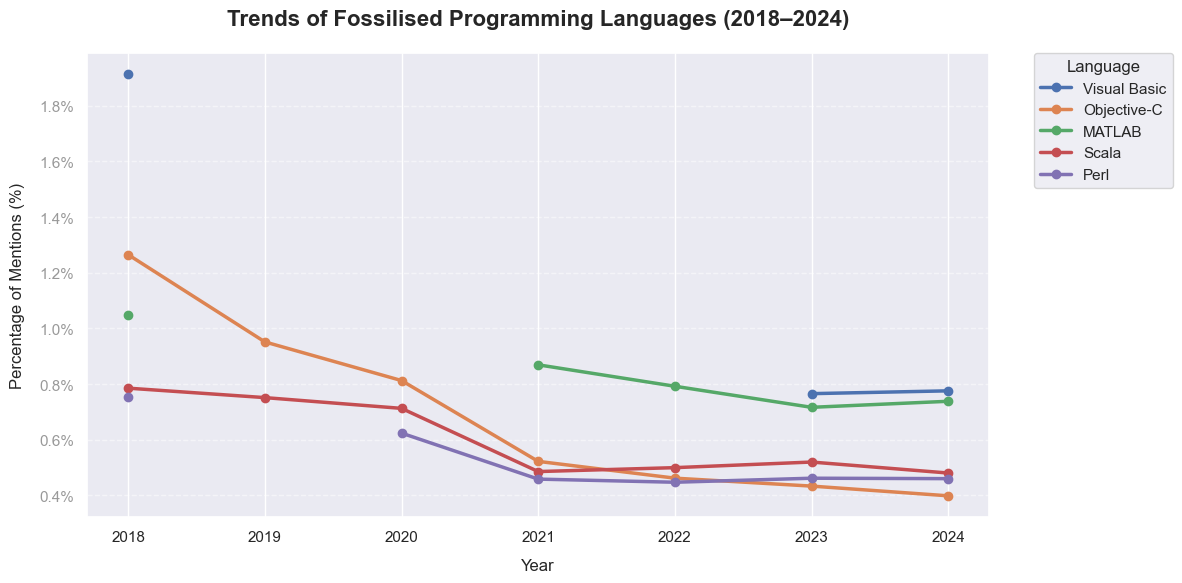

In [110]:
#plot
plt.figure(figsize=(12, 6))

for lang in top_5_fossilised_langs:
    plt.plot(df_lang_pct_pivot.index,
             df_lang_pct_pivot[lang],
             label=lang,
             marker='o',
             linewidth=2.5)

#title and label setting
plt.title("Trends of Fossilised Programming Languages (2018–2024)",
         fontsize = 16,
         fontweight = "bold",
         pad = 20)
plt.xlabel("Year",
          labelpad = 10)
plt.ylabel("Percentage of Mentions (%)",
          labelpad = 10)
#grid and ticks
plt.grid(axis = 'y',
        linestyle = '--',
        alpha = 0.5)
plt.xticks(df_lang_pct_pivot.index)  # make sure all years shown
plt.yticks(color="grey",
           alpha=0.8)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:.1f}%')) 

#lagend and layout
plt.legend(title='Language',
           bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=0.)
plt.tight_layout()

#print and show
plt.show()

**Note:**  
Some languages, such as *Visual Basic*, show gaps in the timeline due to missing survey mentions in certain years (e.g. 2019–2022).  
This reflects actual `NaN` values in the data — not plotting errors.

Below is a snapshot of the underlying data for verification:

In [113]:
df_lang_pct_pivot.loc[:, top_5_fossilised_langs]

Language,Visual Basic,Objective-C,MATLAB,Scala,Perl
Year,,,,,
2018,1.914861,1.264942,1.047767,0.785137,0.752996
2019,NaN,0.951408,NaN,0.751183,NaN
2020,NaN,0.812489,NaN,0.712490,0.623602
2021,NaN,0.521963,0.869035,0.485358,0.458243
2022,NaN,0.461638,0.791961,0.499428,0.446957
2023,0.765407,0.433116,0.716282,0.519567,0.461433
2024,0.775526,0.398159,0.737975,0.480087,0.459916


Top down 10

In [114]:
top_10_fossilised_langs = drop.sort_values(ascending=False).head(10).index.tolist()
print(top_10_fossilised_langs)

['Visual Basic', 'Objective-C', 'MATLAB', 'Scala', 'Perl', 'VBA', 'Groovy']


In [115]:
#expland the band for top 10
fossilised_candidates_10 = pct_2018[(pct_2018 > 0.4) & (pct_2024 < 1)].index.tolist()
drop_10 = (pct_2018 - pct_2024)[fossilised_candidates_10]
top_10_fossilised_langs = drop_10.sort_values(ascending=False).head(10).index.tolist()

Note: The definition of "fossilised" here was expanded slightly (2018 > 0.4% and 2024 < 1%) to include 10 significant declining languages. While not all were hugely popular to begin with, their consistent downward trend justifies their inclusion.

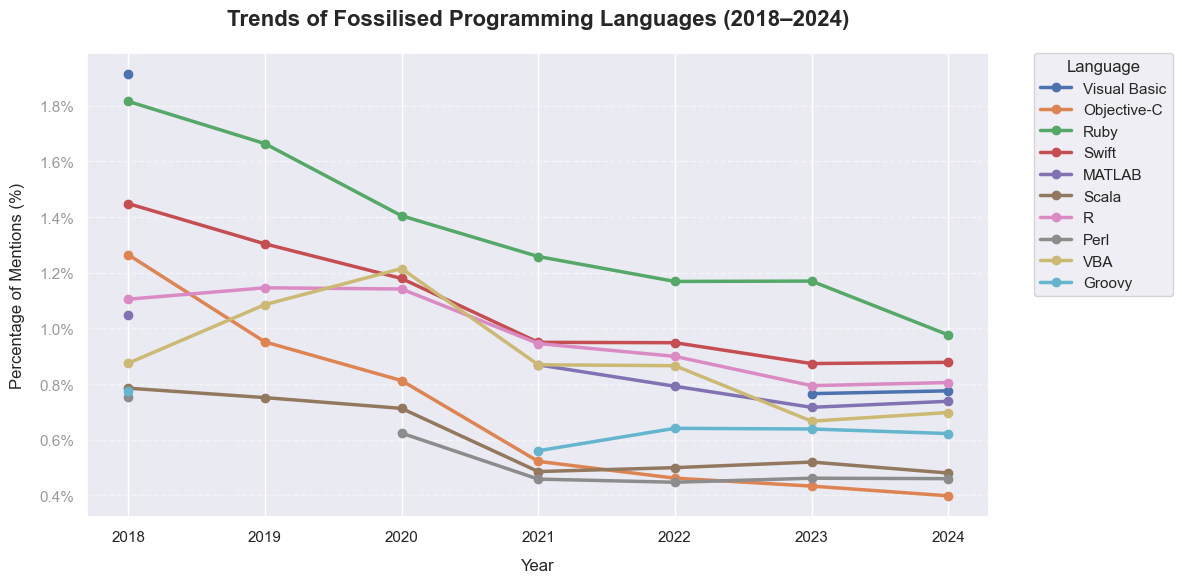

In [116]:
#plot
plt.figure(figsize=(12, 6))

for lang in top_10_fossilised_langs:
    plt.plot(df_lang_pct_pivot.index,
             df_lang_pct_pivot[lang],
             label=lang,
             marker='o',
             linewidth=2.5)

#title and label setting
plt.title("Trends of Fossilised Programming Languages (2018–2024)",
         fontsize = 16,
         fontweight = "bold",
         pad = 20)
plt.xlabel("Year",
          labelpad = 10)
plt.ylabel("Percentage of Mentions (%)",
          labelpad = 10)
#grid and ticks
plt.grid(axis = 'y',
        linestyle = '--',
        alpha = 0.5)
plt.xticks(df_lang_pct_pivot.index)  # make sure all years shown
plt.yticks(color="grey",
           alpha=0.8)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:.1f}%')) 

#lagend and layout
plt.legend(title='Language',
           bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=0.)
plt.tight_layout()

#print and show
plt.show()

# Analyst Language Trends: Why Python and SQL Are Surging While R Declines (2018-2024)

In [118]:
analyst_langs = ['Python', 'SQL', 'R']
df_analyst_trend = df_lang_pct_pivot[analyst_langs].copy()

In [119]:
df_analyst_trend['Year'] = df_lang_pct_pivot.index
df_analyst_trend = df_analyst_trend.set_index('Year')

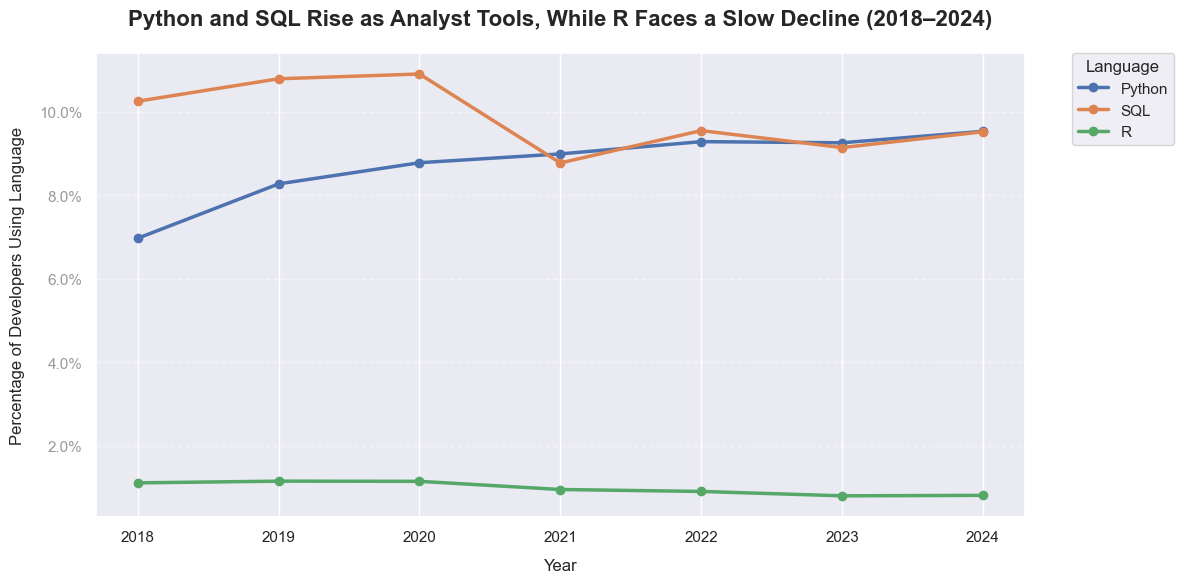

In [120]:
#plot
plt.figure(figsize=(12, 6))

for lang in analyst_langs:
    plt.plot(df_analyst_trend.index,
             df_analyst_trend[lang],
             label=lang,
             marker='o',
             linewidth=2.5)

#title and label setting
plt.title("Python and SQL Rise as Analyst Tools, While R Faces a Slow Decline (2018–2024)",
         fontsize = 16,
         fontweight = "bold",
         pad = 20)
plt.xlabel("Year",
          labelpad = 10)
plt.ylabel("Percentage of Developers Using Language",
          labelpad = 10)
#grid and ticks
plt.grid(axis = 'y',
        linestyle = '--',
        alpha = 0.5)
plt.xticks(df_lang_pct_pivot.index)  # make sure all years shown
plt.yticks(color="grey",
           alpha=0.8)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:.1f}%')) 

#lagend and layout
plt.legend(title='Language',
           bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=0.)
plt.tight_layout()

#print and show
plt.show()